In [35]:
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/fruits_dataset.tar.gz

--2024-07-17 06:33:57--  https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/fruits_dataset.tar.gz
Resolving dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)... 52.216.169.243, 3.5.31.150, 52.216.154.204, ...
Connecting to dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)|52.216.169.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 361408056 (345M) [application/x-gzip]
Saving to: ‘fruits_dataset.tar.gz.1’

fruits_dataset.tar. 100%[===================>] 344.67M  39.0MB/s    in 8.9s    

2024-07-17 06:34:07 (38.5 MB/s) - ‘fruits_dataset.tar.gz.1’ saved [361408056/361408056]



In [36]:
import tensorflow as tf


In [37]:
import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

# Use it like this:
extract_tar_gz('/content/fruits_dataset.tar.gz', '/content/')

In [38]:
from os import path
train_set=tf.keras.utils.image_dataset_from_directory(
    'fruits/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    batch_size=256,
    validation_split=0.25,
    subset='training',
    seed=417
)
validation_set=tf.keras.utils.image_dataset_from_directory(
    'fruits/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    batch_size=256,
    validation_split=0.25,
    subset='validation',
    seed=417
)
test_set=tf.keras.utils.image_dataset_from_directory(
    'fruits/test',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    batch_size=256,
    seed=417
)

Found 67692 files belonging to 131 classes.
Using 50769 files for training.
Found 67692 files belonging to 131 classes.
Using 16923 files for validation.
Found 22688 files belonging to 131 classes.


In [39]:
scaler=tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [40]:
train_set_normalised=train_set.map(lambda x,y: (scaler(x),y))
validation_set_normalised=validation_set.map(lambda x,y: (scaler(x),y))
test_set_normalised=test_set.map(lambda x,y: (scaler(x),y))

## Test1


In [41]:
# from tensorflow.keras import layers

# input_layer=layers.Input(shape=(100,100,3))
# features_layer=base_model(input_layer, training=False)
# global_pooling=layers.GlobalAveragePooling2D()(features_layer)
# output=layers.Dense(131)(global_pooling)
# model=tf.keras.Model(inputs=input_layer,outputs=output)
# model.summary()

In [42]:
# opt=tf.keras.optimizers.SGD()
# loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True)
# model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [43]:
# model.fit(train_set_normalised, validation_data=validation_set_normalised, epochs=3)

In [44]:
# import tensorflow as tf
# from tensorflow.keras import layers, applications, optimizers, losses, models

# # Load the base model and set it to non-trainable
# base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
# base_model.trainable = False

# # Create the input layer
# input_layer = layers.Input(shape=(100, 100, 3))

# # Preprocess the input
# preprocessed_input_layer = applications.resnet50.preprocess_input(input_layer)

# # Create the feature extraction layer
# features_layer = base_model(preprocessed_input_layer, training=False)

# # Apply global average pooling
# global_pooling = layers.GlobalAveragePooling2D()(features_layer)

# # Create the output layer
# output = layers.Dense(131, activation='softmax')(global_pooling)

# # Instantiate the model
# model = models.Model(inputs=input_layer, outputs=output)

# # Display the model summary to confirm the total parameters
# model.summary()

# # Instantiate the SGD optimizer
# opt = optimizers.SGD(learning_rate=0.001, momentum=0.9)

# # Instantiate the loss function
# loss = losses.CategoricalCrossentropy()  # without from_logits=True since output layer has softmax activation

# # Compile the model
# model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

# # Fit the model on the normalized training data for 3 epochs
# model.fit(train_set, validation_data=validation_set, epochs=3)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(test_set)

# # Print the test set accuracy
# print(f"Test set accuracy: {test_acc}")


In [45]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
# from tensorflow.keras.applications import ResNet50

# # Create an input layer
# input_layer = Input(shape=(100, 100, 3))

# # Preprocess input images
# preprocessed_input_layer = tf.keras.applications.resnet50.preprocess_input(input_layer)

# # Create ResNet-50 base model
# base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=preprocessed_input_layer)

# # Add other layers (e.g., GlobalAveragePooling2D, Dense)
# global_pooling = GlobalAveragePooling2D()(base_model.output)
# num_classes = 131  # Replace with the actual number of classes in your dataset
# output = Dense(num_classes, activation='softmax')(global_pooling)

# # Create the final model
# model = tf.keras.models.Model(inputs=input_layer, outputs=output)

# # Compile the model
# opt = tf.keras.optimizers.SGD(learning_rate=0.001)  # Adjust learning rate as needed
# loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)  # Use appropriate loss function
# model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

# # Fit the model on the normalized training data
# model.fit(train_set, epochs=3, validation_data=validation_set)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(test_set)
# print(f"Test accuracy: {test_acc:.4f}")


In [46]:
from tensorflow.keras import applications

base_model = applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(100, 100, 3)
)

## Final

In [47]:
base_model.trainable=False

In [48]:
from tensorflow.keras import layers

input_layer = layers.Input(shape=(100, 100, 3))
preprocessed_input_layer = applications.resnet50.preprocess_input(input_layer)
features_layer = base_model(preprocessed_input_layer, training=False)
global_pooling = layers.GlobalAveragePooling2D()(features_layer)
output = layers.Dense(131)(global_pooling)  # No activation
model = tf.keras.Model(inputs=input_layer, outputs=output)
model.summary()

# Compile the model with appropriate loss function
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)  # Using momentum
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)  # from_logits=True since no activation
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])



Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 tf.__operators__.getitem_9  (None, 100, 100, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_9 (TFOpLamb  (None, 100, 100, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_9  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                           

In [49]:
model.fit(train_set, validation_data=validation_set, epochs=3)

Epoch 1/3
199/199 [==============================] - 63s 301ms/step - loss: 2.1772 - accuracy: 0.6024 - val_loss: 0.7758 - val_accuracy: 0.9075
Epoch 2/3
199/199 [==============================] - 51s 252ms/step - loss: 0.5299 - accuracy: 0.9475 - val_loss: 0.3906 - val_accuracy: 0.9657
Epoch 3/3
199/199 [==============================] - 50s 247ms/step - loss: 0.3098 - accuracy: 0.9763 - val_loss: 0.2645 - val_accuracy: 0.9798


In [50]:
test_loss, test_acc=model.evaluate(test_set)


89/89 [==============================] - 17s 185ms/step - loss: 0.4801 - accuracy: 0.9145


In [51]:
# Re training the model
base_model = applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(100, 100, 3)
)

base_model.trainable=True

input_layer = layers.Input(shape=(100, 100, 3))
preprocessed_input_layer = applications.resnet50.preprocess_input(input_layer)
features_layer = base_model(preprocessed_input_layer, training=False)
global_pooling = layers.GlobalAveragePooling2D()(features_layer)
output = layers.Dense(131)(global_pooling)  # No activation
model = tf.keras.Model(inputs=input_layer, outputs=output)
model.summary()

# Compile the model with appropriate loss function
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)  # from_logits=True since no activation
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

model.fit(train_set, validation_data=validation_set, epochs=5)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 100, 100, 3)       0         
 0 (SlicingOpLambda)                                             
                                                                 
 tf.nn.bias_add_10 (TFOpLam  (None, 100, 100, 3)       0         
 bda)                                                            
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 0 (GlobalAveragePooling2D)                                      
                                                          

In [52]:
test_loss, test_acc=model.evaluate(test_set)

89/89 [==============================] - 17s 187ms/step - loss: 0.1805 - accuracy: 0.9583


##  Transfer Learning on the Beans Dataset I

In [53]:
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz

--2024-07-17 06:51:27--  https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz
Resolving dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)... 3.5.27.235, 3.5.29.155, 3.5.29.91, ...
Connecting to dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)|3.5.27.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179790562 (171M) [application/x-gzip]
Saving to: ‘beans_dataset.tar.gz.1’

beans_dataset.tar.g 100%[===================>] 171.46M  39.3MB/s    in 9.0s    

2024-07-17 06:51:37 (19.0 MB/s) - ‘beans_dataset.tar.gz.1’ saved [179790562/179790562]



In [54]:
import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

# Use it like this:
extract_tar_gz('/content/beans_dataset.tar.gz', '/content/')

In [55]:
from os import path
train=tf.keras.utils.image_dataset_from_directory(
    'beans/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    batch_size=128,
    seed=417
)
val=tf.keras.utils.image_dataset_from_directory(
    'beans/validation',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    batch_size=128,
    seed=417
)
test=tf.keras.utils.image_dataset_from_directory(
    'beans/test',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    batch_size=128,
    seed=417
)

Found 1034 files belonging to 3 classes.
Found 133 files belonging to 3 classes.
Found 128 files belonging to 3 classes.


In [56]:
base_model = applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(100, 100, 3)
)

base_model.trainable=False

input_layer = layers.Input(shape=(100, 100, 3))
preprocessed_input_layer = applications.resnet50.preprocess_input(input_layer)
augmentation_layer=layers.RandomFlip('horizontal_and_vertical')
features_layer = base_model(preprocessed_input_layer, training=False)
global_pooling = layers.GlobalAveragePooling2D()(features_layer)
output=layers.Dense(3)(global_pooling)
model = tf.keras.Model(inputs=input_layer, outputs=output)
model.summary()

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

history=model.fit(train, validation_data=val, epochs=20)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 100, 100, 3)       0         
 1 (SlicingOpLambda)                                             
                                                                 
 tf.nn.bias_add_11 (TFOpLam  (None, 100, 100, 3)       0         
 bda)                                                            
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 1 (GlobalAveragePooling2D)                                      
                                                          

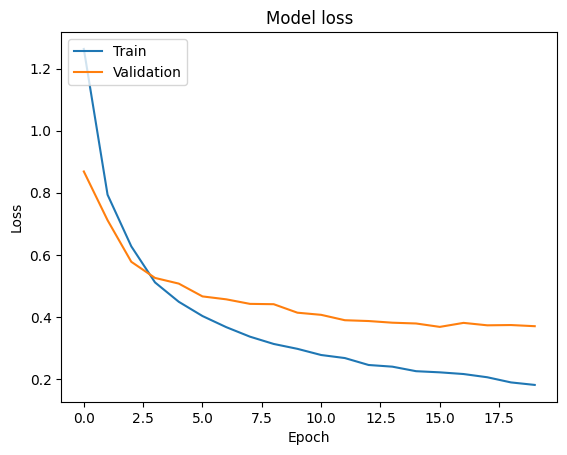

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

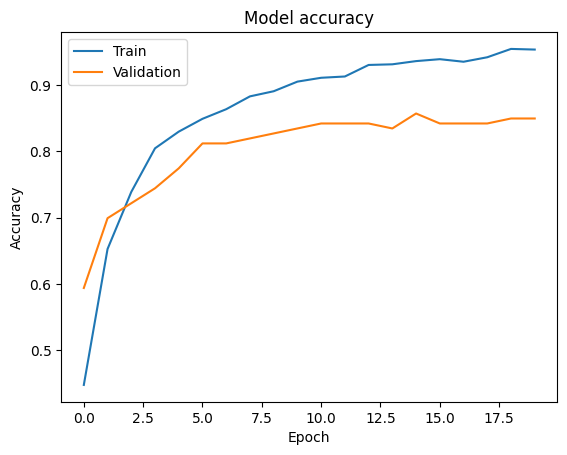

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [59]:
base_model = applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(100, 100, 3)
)

base_model.trainable=True

for layer in base_model.layers[:-10]:
    layer.trainable = False

input_layer = layers.Input(shape=(100, 100, 3))
preprocessed_input_layer = applications.resnet50.preprocess_input(input_layer)
augmentation_layer=layers.RandomFlip('horizontal_and_vertical')
features_layer = base_model(preprocessed_input_layer, training=False)
global_pooling = layers.GlobalAveragePooling2D()(features_layer)
output=layers.Dense(3)(global_pooling)
model = tf.keras.Model(inputs=input_layer, outputs=output)
model.summary()

opt=tf.keras.optimizers.Adam(learning_rate=0.00001)
loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

model.fit(train, validation_data=val, epochs=5)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 100, 100, 3)       0         
 2 (SlicingOpLambda)                                             
                                                                 
 tf.nn.bias_add_12 (TFOpLam  (None, 100, 100, 3)       0         
 bda)                                                            
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 2 (GlobalAveragePooling2D)                                      
                                                          

In [60]:
test_loss, test_acc=model.evaluate(test)


1/1 [==============================] - 0s 317ms/step - loss: 0.6796 - accuracy: 0.7109
